<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta

csv_filename = '../data/Climate_Data/asos/asos.csv'

df = pd.read_csv(csv_filename)
df['valid'] = pd.to_datetime(df['valid'], format='%Y-%m-%d %H:%M')

C:\Users\ishaq\AppData\Local\Temp\ipykernel_14944\2772694711.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filename)


In [2]:
df

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,2G4,2012-01-01 00:10:00,33.8,33.8,100.00,260.0,5.0,NaN,30.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.53,K2G4 010010Z AUTO 26005KT 1/4SM FG OVC001 01/0...,NaN
1,CGS,2012-01-01 00:10:00,51.8,35.6,53.81,0.0,0.0,NaN,30.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.80,KCGS 010010Z AUTO 00000KT 10SM BKN055 11/02 A3...,NaN
2,FME,2012-01-01 00:12:00,46.4,37.4,70.68,260.0,4.0,NaN,30.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.24,KFME 010012Z AUTO 26004KT 10SM BKN050 08/03 A3...,NaN
3,DMW,2012-01-01 00:13:00,48.2,39.2,70.88,290.0,8.0,NaN,30.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.07,KDMW 010013Z AUTO 29008KT 10SM BKN033 BKN043 0...,NaN
4,2W6,2012-01-01 00:13:00,50.0,35.6,57.52,290.0,4.0,NaN,30.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.44,K2W6 010013Z AUTO 29004KT 10SM CLR 10/02 A3007...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885093,MTN,2023-08-30 23:55:00,77.0,59.0,53.80,320.0,7.0,0.0,29.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,KMTN 302355Z 32007KT 10SM CLR 25/15 A2979,NaN
7885094,HGR,2023-08-30 23:55:00,NaN,NaN,NaN,330.0,8.0,NaN,29.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KHGR 302355Z AUTO 33008KT 10SM CLR 22/13 A2985...,NaN
7885095,GAI,2023-08-30 23:55:00,NaN,NaN,NaN,310.0,2.0,NaN,29.83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KGAI 302355Z AUTO 31002KT 8SM CLR 23/14 A2983 ...,NaN
7885096,OXB,2023-08-30 23:55:00,NaN,NaN,NaN,0.0,0.0,NaN,29.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KOXB 302355Z AUTO 00000KT 10SM CLR 23/21 A2977...,NaN


https://mesonet.agron.iastate.edu/request/download.phtml?network=AL_ASOS

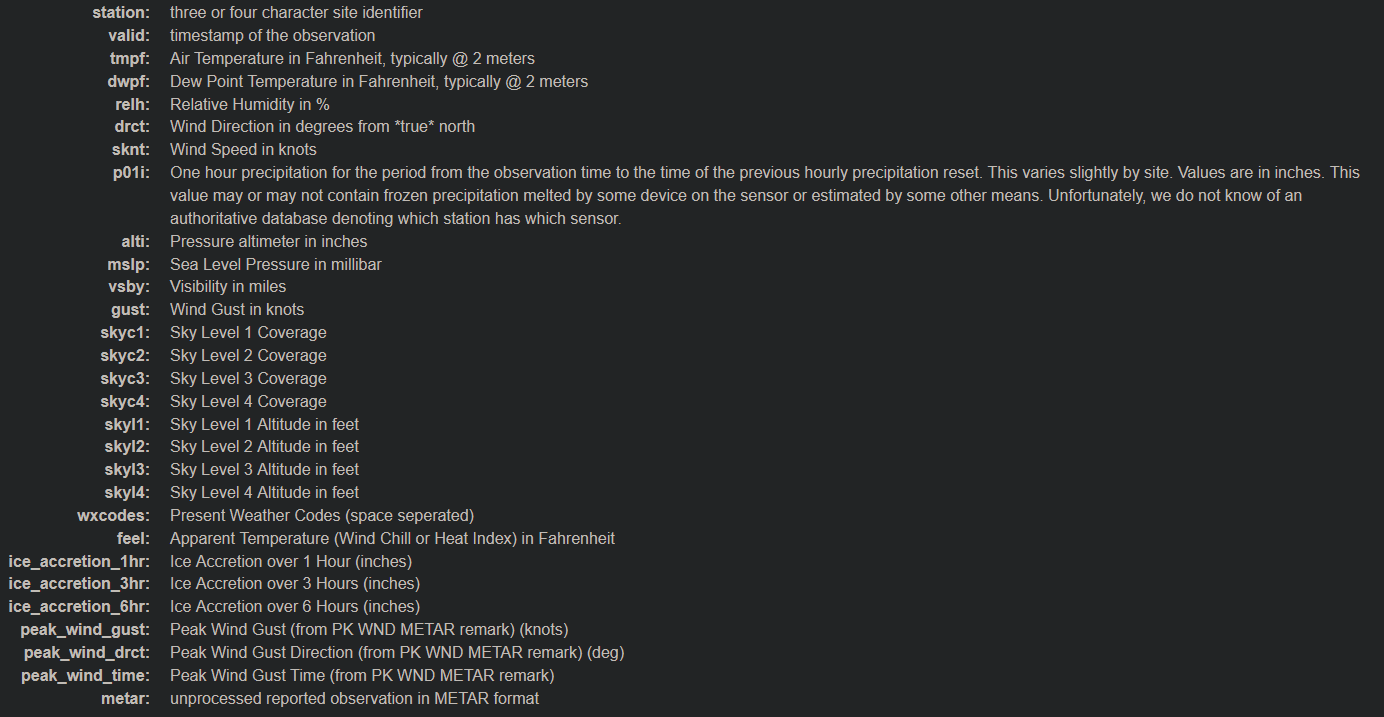

In [3]:
# threshold = 10000
# filtered_df = df.dropna(axis=1, thresh=len(df) - threshold)

# df.dropna(axis=1, thresh=len(df) - threshold, inplace=True)
# na_counts = df.isna().sum()
# for column, count in na_counts.items():
#     print(f'{column}: {count}')

In [4]:
na_counts = df.isna().sum()
for column, count in na_counts.items():
    print(f'{column}: {count}')

station: 0
valid: 0
tmpf: 3698016
dwpf: 3735838
relh: 3738515
drct: 317949
sknt: 208929
p01i: 3564543
alti: 30839
mslp: 6810980
vsby: 191963
gust: 7120466
skyc1: 220248
skyc2: 6373810
skyc3: 7285425
skyc4: 7837160
skyl1: 3937581
skyl2: 6398304
skyl3: 7313010
skyl4: 7866800
wxcodes: 6878512
ice_accretion_1hr: 7883563
ice_accretion_3hr: 7884872
ice_accretion_6hr: 7884739
peak_wind_gust: 7833481
peak_wind_drct: 7833481
peak_wind_time: 7833481
feel: 3784042
metar: 6762
snowdepth: 7885051


In [5]:
df.drop(columns=['metar','station'],inplace=True)

In [6]:
df

,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,snowdepth
0,2012-01-01 00:10:00,33.8,33.8,100.00,260.0,5.0,NaN,30.04,NaN,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.53,NaN
1,2012-01-01 00:10:00,51.8,35.6,53.81,0.0,0.0,NaN,30.07,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.80,NaN
2,2012-01-01 00:12:00,46.4,37.4,70.68,260.0,4.0,NaN,30.08,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.24,NaN
3,2012-01-01 00:13:00,48.2,39.2,70.88,290.0,8.0,NaN,30.07,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.07,NaN
4,2012-01-01 00:13:00,50.0,35.6,57.52,290.0,4.0,NaN,30.07,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885093,2023-08-30 23:55:00,77.0,59.0,53.80,320.0,7.0,0.0,29.79,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,NaN
7885094,2023-08-30 23:55:00,NaN,NaN,NaN,330.0,8.0,NaN,29.85,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7885095,2023-08-30 23:55:00,NaN,NaN,NaN,310.0,2.0,NaN,29.83,NaN,8.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7885096,2023-08-30 23:55:00,NaN,NaN,NaN,0.0,0.0,NaN,29.77,NaN,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
numeric_columns = ['tmpf','dwpf','sknt',  'relh', 'alti','vsby', 'feel']
df['date_hour'] = df['valid'].dt.round('H')
result = df.groupby(['date_hour']).agg({**{col: 'mean' for col in numeric_columns}, 'skyc1': 'first'}).reset_index()
result

,date_hour,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,2012-01-01 00:00:00,46.400000,36.581818,4.818182,70.132727,30.071818,8.272727,43.697273,OVC
1,2012-01-01 01:00:00,47.731429,37.502857,4.764706,68.402571,30.086471,9.441176,45.584571,BKN
2,2012-01-01 02:00:00,46.408333,37.500000,4.680851,71.891042,30.097391,9.468085,43.975208,CLR
3,2012-01-01 03:00:00,45.111628,37.204651,4.023810,74.466744,30.107073,9.738095,42.710930,OVC
4,2012-01-01 04:00:00,43.297674,36.567442,2.619048,77.824884,30.118333,10.000000,41.607209,CLR
...,...,...,...,...,...,...,...,...,...
102236,2023-08-30 20:00:00,81.754054,60.554054,7.552083,49.497297,29.761471,9.970588,82.432703,FEW
102237,2023-08-30 21:00:00,81.297436,59.774359,7.755556,48.824615,29.763830,9.967742,81.813590,CLR
102238,2023-08-30 22:00:00,79.678947,59.781579,6.637255,51.840526,29.777573,9.970588,80.283947,FEW
102239,2023-08-30 23:00:00,77.155263,60.178947,4.711111,57.677105,29.787527,10.000000,77.438947,CLR


In [8]:
na_counts = result.isna().sum()
for column, count in na_counts.items():
    print(f'{column}: {count}')

date_hour: 0
tmpf: 0
dwpf: 0
sknt: 0
relh: 41
alti: 0
vsby: 0
feel: 41
skyc1: 0


In [9]:
result['date_hour'].value_counts()

date_hour
2012-01-01 00:00:00    1
2019-10-11 09:00:00    1
2019-10-11 07:00:00    1
2019-10-11 06:00:00    1
2019-10-11 05:00:00    1
                      ..
2015-11-20 22:00:00    1
2015-11-20 21:00:00    1
2015-11-20 20:00:00    1
2015-11-20 19:00:00    1
2023-08-31 00:00:00    1
Name: count, Length: 102241, dtype: int64

In [10]:
start_date = datetime(2012, 1, 1)
end_date = datetime(2023, 9, 30) 
expected_dates = pd.date_range(start=start_date, end=end_date, freq='H')
reference_df = pd.DataFrame({'date_hour': expected_dates})

merged_df = pd.merge(reference_df, result, on='date_hour', how='outer')

filled_df = merged_df.set_index('date_hour').ffill().bfill().reset_index()

filled_df

,date_hour,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,2012-01-01 00:00:00,46.400000,36.581818,4.818182,70.132727,30.071818,8.272727,43.697273,OVC
1,2012-01-01 01:00:00,47.731429,37.502857,4.764706,68.402571,30.086471,9.441176,45.584571,BKN
2,2012-01-01 02:00:00,46.408333,37.500000,4.680851,71.891042,30.097391,9.468085,43.975208,CLR
3,2012-01-01 03:00:00,45.111628,37.204651,4.023810,74.466744,30.107073,9.738095,42.710930,OVC
4,2012-01-01 04:00:00,43.297674,36.567442,2.619048,77.824884,30.118333,10.000000,41.607209,CLR
...,...,...,...,...,...,...,...,...,...
102956,2023-09-29 20:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR
102957,2023-09-29 21:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR
102958,2023-09-29 22:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR
102959,2023-09-29 23:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR


In [11]:
filled_df.isna().sum()

date_hour    0
tmpf         0
dwpf         0
sknt         0
relh         0
alti         0
vsby         0
feel         0
skyc1        0
dtype: int64

In [17]:
df.rename(columns={'data_hour': 'DATE'}, inplace=True)
filled_df

,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,2012-01-01 00:00:00,46.400000,36.581818,4.818182,70.132727,30.071818,8.272727,43.697273,OVC
1,2012-01-01 01:00:00,47.731429,37.502857,4.764706,68.402571,30.086471,9.441176,45.584571,BKN
2,2012-01-01 02:00:00,46.408333,37.500000,4.680851,71.891042,30.097391,9.468085,43.975208,CLR
3,2012-01-01 03:00:00,45.111628,37.204651,4.023810,74.466744,30.107073,9.738095,42.710930,OVC
4,2012-01-01 04:00:00,43.297674,36.567442,2.619048,77.824884,30.118333,10.000000,41.607209,CLR
...,...,...,...,...,...,...,...,...,...
102956,2023-09-29 20:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR
102957,2023-09-29 21:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR
102958,2023-09-29 22:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR
102959,2023-09-29 23:00:00,75.304348,60.326087,3.769231,61.372609,29.796792,9.903846,75.366087,CLR


In [18]:
csv_filename = '../data/Climate_Data/asos/asos_clean.csv'
filled_df.to_csv(csv_filename, index=False)
